                  i    r           allh     t        Value              h
4343  Nuclear-Stor1  p25  y2012d017h001  2050  1811.250000  y2012d017h001
4349  Nuclear-Stor1  p25  y2012d017h002  2050  1409.090308  y2012d017h002
4355  Nuclear-Stor1  p25  y2012d017h003  2050  1129.433565  y2012d017h003
4361  Nuclear-Stor1  p25  y2012d017h004  2050  1303.928522  y2012d017h004
4367  Nuclear-Stor1  p25  y2012d017h005  2050  1346.010897  y2012d017h005
...             ...  ...            ...   ...          ...            ...
4838  Nuclear-Stor1  p25  y2012d338h020  2050  1811.250000  y2012d338h020
4844  Nuclear-Stor1  p25  y2012d338h021  2050  1811.250000  y2012d338h021
4850  Nuclear-Stor1  p25  y2012d338h022  2050  1811.250000  y2012d338h022
4856  Nuclear-Stor1  p25  y2012d338h023  2050  1811.250000  y2012d338h023
4862  Nuclear-Stor1  p25  y2012d338h024  2050  1811.250000  y2012d338h024

[96 rows x 6 columns]
         * *.1    r            *.2     t      Value              h
12    load  na  p25  y

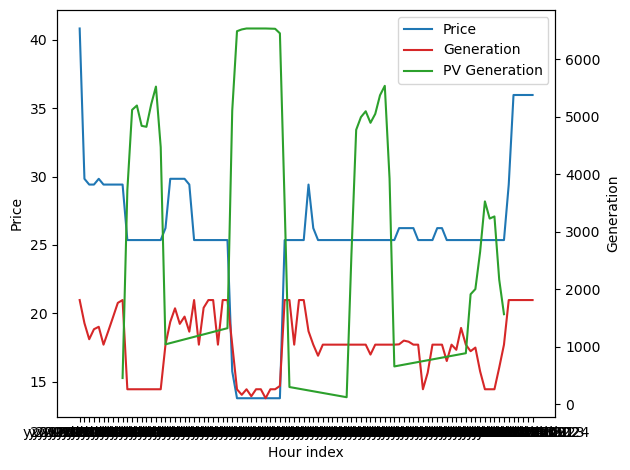

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gen_h = pd.read_csv('runs/gigawatt2_bigstorutah/outputs/gen_h.csv')
gen_h = gen_h[gen_h['t'] == 2050]
gen_h = gen_h[gen_h['r'] == 'p25']
gen_h['h'] = gen_h['allh']
pv_h = (
    gen_h[gen_h['i'].str.startswith('upv')]
    .groupby('h', as_index=False)['Value']
    .sum()
)
gen_h = gen_h[gen_h['i'].str.startswith('Nuclear-Stor')]
# extracted = gen_h['h'].str.extract(r'd(\d{3})h(\d{3})')
# valid = extracted.notna().all(axis=1)
# gen_h = gen_h[valid].copy()
# gen_h['h'] = extracted.loc[valid, 0].astype(int) * 24 + extracted.loc[valid, 1].astype(int)
print(gen_h)

price = pd.read_csv('runs/gigawattnuc_bigstorutah/outputs/reqt_price.csv')
price = price[price['t'] == 2050]
price = price[price['r'] == 'p25']
price = price[price.iloc[:, 0] == 'load']

price['h'] = price.iloc[:, 3]
price = price[~price['h'].str.startswith('s')]

print(price)

fig, ax = plt.subplots()
ax.plot(price['h'], price['Value'], label='Price')
ax.set_xlabel('Hour index')
ax.set_ylabel('Price')

ax2 = ax.twinx()
ax2.plot(gen_h['h'], gen_h['Value'], color='tab:red', label='Generation')
ax2.plot(pv_h['h'], pv_h['Value'], color='tab:green', label='PV Generation')
ax2.set_ylabel('Generation')
l1, lab1 = ax.get_legend_handles_labels()
l2, lab2 = ax2.get_legend_handles_labels()
ax.legend(l1 + l2, lab1 + lab2, loc='best')


plt.tight_layout()